In [2]:
CPI = r'C:\Users\dcon7\OneDrive\Desktop\Homework\Assignment\BuildProjects\CPI_Denver\Consumer_Price_Index_in_Denver.csv'

In [3]:
import numpy as np
import pandas as pd

In [463]:
df = pd.read_csv(CPI)

In [464]:
df.shape

(4349, 17)

In [465]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   stateFips              4349 non-null   int64  
 1   area                   4349 non-null   int64  
 2   areaType               4349 non-null   int64  
 3   period                 4349 non-null   int64  
 4   periodYear             4349 non-null   int64  
 5   periodType             4349 non-null   int64  
 6   periodTypeDescription  4349 non-null   object 
 7   cpi                    4349 non-null   float64
 8   title                  4349 non-null   object 
 9   type                   4349 non-null   int64  
 10  source                 4349 non-null   int64  
 11  cpiSourceDescription   4349 non-null   object 
 12  percentChangeYear      4349 non-null   float64
 13  percentChangeMonth     4131 non-null   float64
 14  dataRegion             4349 non-null   object 
 15  area

In [466]:
df.head()

,stateFips,area,areaType,period,periodYear,periodType,periodTypeDescription,cpi,title,type,source,cpiSourceDescription,percentChangeYear,percentChangeMonth,dataRegion,areaName,areaDescription
0,0,0,0,0,1913,1,Annual,9.9,"CPI-U all items 1982-84=100, not seasonally ad...",1,1,"US DOL, Bureau of Labor Statistics",0.0,0.0,US,United States,The United States of America (commonly referre...
1,0,0,0,0,1913,1,Annual,10.0,"CPI-W all items 1982-84=100, not seasonally ad...",3,1,"US DOL, Bureau of Labor Statistics",0.0,0.0,US,United States,The United States of America (commonly referre...
2,0,0,0,1,1913,3,Monthly,9.8,"CPI-U all items 1982-84=100, not seasonally ad...",1,1,"US DOL, Bureau of Labor Statistics",0.0,-1.0,US,United States,The United States of America (commonly referre...
3,0,0,0,1,1913,3,Monthly,9.9,"CPI-W all items 1982-84=100, not seasonally ad...",3,1,"US DOL, Bureau of Labor Statistics",0.0,-1.0,US,United States,The United States of America (commonly referre...
4,0,0,0,2,1913,3,Monthly,9.8,"CPI-U all items 1982-84=100, not seasonally ad...",1,1,"US DOL, Bureau of Labor Statistics",0.0,0.0,US,United States,The United States of America (commonly referre...


In [467]:
df['areaName'].unique()

array(['United States', 'Denver/Boulder/Greeley'], dtype=object)

In [468]:
df['cpiSourceDescription'].value_counts()

US DOL, Bureau of Labor Statistics    4349
Name: cpiSourceDescription, dtype: int64

In [469]:
# Wrangle

df = df.copy()

# Rename Columns
df.columns = ['State_Fips', 'Area', 'Area_Type', 'Period', 'Period_Year', 'Period_Type', 
              'Period_Type_Description', 'CPI', 'Title', 'Type', 'Source', 'CPI_Source_Description',
             'Percent_Change_Year', 'Percent_Change_Month', 'Data_Region', 'Area_Name', 'Area_Description']

# Drop Columns with only 1 value
df = df.drop(columns = ['CPI_Source_Description', 'Source'])

# Sort the Dataframe by Period Year ascending
df = df.set_index('Period_Year').sort_index()

# Create a New Column with Bool Values.
df['Is_Colorado'] = df['Area_Name']
df['Is_Colorado'].iloc[df['Is_Colorado'] != 'Denver/Boulder/Greeley'] = 0
df['Is_Colorado'].iloc[df['Is_Colorado'] == 'Denver/Boulder/Greeley'] = 1
    
# Remove Leaky Columns
df = df.drop(columns = ['Area_Description', 'Area_Name', 'Data_Region','Area', 'Area_Type', 'State_Fips', 'Title'])

F:\WritingSoftware\Anaconda\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [470]:
df.head()

,Period,Period_Type,Period_Type_Description,CPI,Type,Percent_Change_Year,Percent_Change_Month,Is_Colorado
Period_Year,,,,,,,,
1913,0,1,Annual,9.9,1,0.0,0.0,0
1913,12,3,Monthly,10.1,3,0.0,0.0,0
1913,12,3,Monthly,10.0,1,0.0,-1.0,0
1913,11,3,Monthly,10.1,3,0.0,0.0,0
1913,11,3,Monthly,10.1,1,0.0,1.0,0


In [471]:
baseline = df['Is_Colorado'].value_counts(normalize = True)[1]

print('Baseline Score:', baseline)

Baseline Score: 0.05840423085766843


In [472]:
target = 'Is_Colorado'

X = df.drop(columns = target)
y = df[target]

In [473]:
X.head()

,Period,Period_Type,Period_Type_Description,CPI,Type,Percent_Change_Year,Percent_Change_Month
Period_Year,,,,,,,
1913,0,1,Annual,9.9,1,0.0,0.0
1913,12,3,Monthly,10.1,3,0.0,0.0
1913,12,3,Monthly,10.0,1,0.0,-1.0
1913,11,3,Monthly,10.1,3,0.0,0.0
1913,11,3,Monthly,10.1,1,0.0,1.0


In [474]:
y.head()

Period_Year
1913    0
1913    0
1913    0
1913    0
1913    0
Name: Is_Colorado, dtype: object

In [475]:
train = df[:-1000]
test = df[-1000:]

print('Train Size', train.shape)
print('Test Size', test.shape)

Train Size (3349, 8)
Test Size (1000, 8)


In [476]:
train.head()

,Period,Period_Type,Period_Type_Description,CPI,Type,Percent_Change_Year,Percent_Change_Month,Is_Colorado
Period_Year,,,,,,,,
1913,0,1,Annual,9.9,1,0.0,0.0,0
1913,12,3,Monthly,10.1,3,0.0,0.0,0
1913,12,3,Monthly,10.0,1,0.0,-1.0,0
1913,11,3,Monthly,10.1,3,0.0,0.0,0
1913,11,3,Monthly,10.1,1,0.0,1.0,0


In [493]:
test.head()

,Period,Period_Type,Period_Type_Description,CPI,Type,Percent_Change_Year,Percent_Change_Month,Is_Colorado
Period_Year,,,,,,,,
1996,7,3,Monthly,157.0,1,3.0,0.2,0
1996,9,3,Monthly,157.8,1,3.0,0.3,0
1996,6,3,Monthly,154.0,4,2.8,0.1,0
1996,6,3,Monthly,156.7,2,2.8,0.2,0
1996,6,3,Monthly,156.7,1,2.8,0.1,0


In [494]:
X_train = X[:-1000]

y_train = y[:-1000]

X_test = X[-1000:]

y_test = y[-1000:]


In [495]:
X_train.head()

,Period,Period_Type,Period_Type_Description,CPI,Type,Percent_Change_Year,Percent_Change_Month
Period_Year,,,,,,,
1913,0,1,Annual,9.9,1,0.0,0.0
1913,12,3,Monthly,10.1,3,0.0,0.0
1913,12,3,Monthly,10.0,1,0.0,-1.0
1913,11,3,Monthly,10.1,3,0.0,0.0
1913,11,3,Monthly,10.1,1,0.0,1.0


In [496]:
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier

In [509]:
y_train = y_train.astype('int')

model = make_pipeline(
    ce.OneHotEncoder(use_cat_names = True), 
    StandardScaler(),
    SimpleImputer(strategy = 'mean'),
    LogisticRegressionCV()
)

In [510]:
model.fit(X_train, y_train)

F:\WritingSoftware\Anaconda\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
F:\WritingSoftware\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Period_Type_Description'],
                               use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('simpleimputer', SimpleImputer()),
                ('logisticregressioncv', LogisticRegressionCV())])

In [511]:
print('Logistic Regression Score:', model.score(X_test, y_test))

Logistic Regression Score: 0.862


In [504]:
tree_model = make_pipeline(
    ce.OneHotEncoder(use_cat_names = True),
    SimpleImputer(strategy = 'mean'),
    RandomForestClassifier(n_jobs = -1)
)

In [505]:
tree_model.fit(X_train, y_train)

F:\WritingSoftware\Anaconda\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Period_Type_Description'],
                               use_cat_names=True)),
                ('simpleimputer', SimpleImputer()),
                ('randomforestclassifier', RandomForestClassifier(n_jobs=-1))])

In [506]:
print('Random Forest Score:', tree_model.score(X_test, y_test))

Random Forest Score: 0.919


In [ ]:
# The Following Two Models are Explained in The README

F:\WritingSoftware\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CPI', ylabel='Density'>

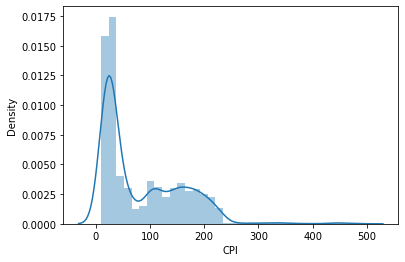

In [512]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(df['CPI'])

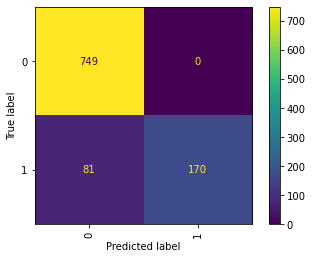

In [508]:
from sklearn.metrics import plot_confusion_matrix

# Plot a Confusion Matrix for the Random Forest model
plot_confusion_matrix(tree_model, X_val, y_val, values_format = '.0f', xticks_rotation = 'vertical')